In [ ]:
import requests;
from html.parser import HTMLParser



In [2]:
# https://en.wikipedia.org/wiki/Data_science

url = "https://en.wikipedia.org/wiki/Data_science"
text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Data science - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featur

In [3]:
class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

In [5]:
parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Special pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations 2 Etymology Toggle Etymology subsection 2.1 Early usage 2.2 Modern usage 3 Data science and data analysis 4 Cloud computing for data science 5 Ethical consideration in data science 6 See also 7 References Toggle the table of contents Data science 50 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Ido Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahasa Melayu မြန်မာဘာသာ Nederlands 日本語 N

In [ ]:
# # import nlp_rake
# import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'nlp_rake'

In [13]:
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)

In [14]:
res = extractor.apply(text)
res

[('data scientist', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('statistical learning', 4.0),
 ('big data', 4.0),
 ('data science', 3.888888888888889),
 ('computer science', 3.888888888888889),
 ('^ davenport', 3.8),
 ('information science', 3.7888888888888888),
 ('cloud computing', 3.75),
 ('data analysis', 3.7),
 ('science', 1.8888888888888888),
 ('analysis', 1.7),
 ('statistics', 1.3076923076923077),
 ('processing', 1.25),
 ('thomas', 1.2),
 ('mathematics', 1.0),
 ('education', 1.0),
 ('communications', 1.0),
 ('chikio', 1.0)]

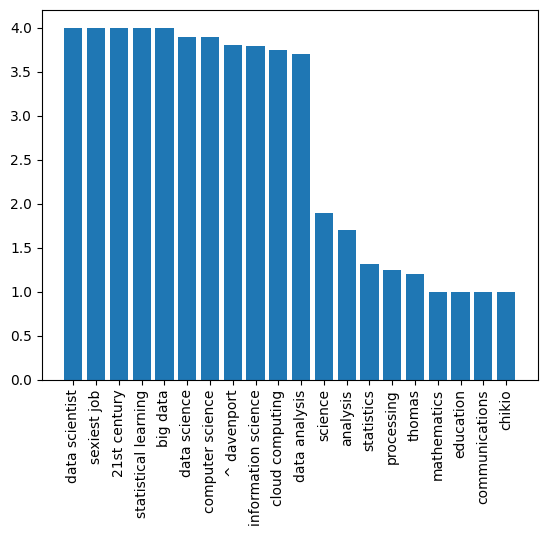

In [17]:
def plot(pair_list):
    pair_list = pair_list[:20]
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [18]:
from wordcloud import WordCloud

In [19]:
wc = WordCloud(background_color='white',width=800,height=600)


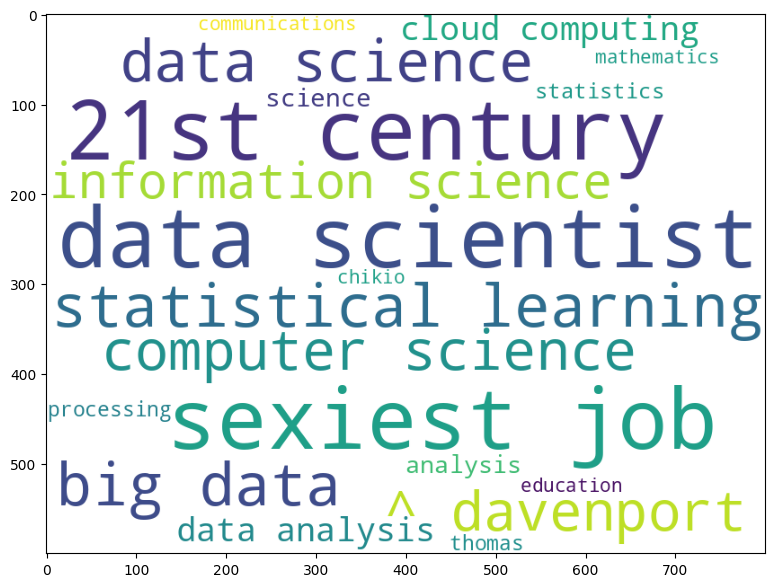

In [20]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res[:20] }))

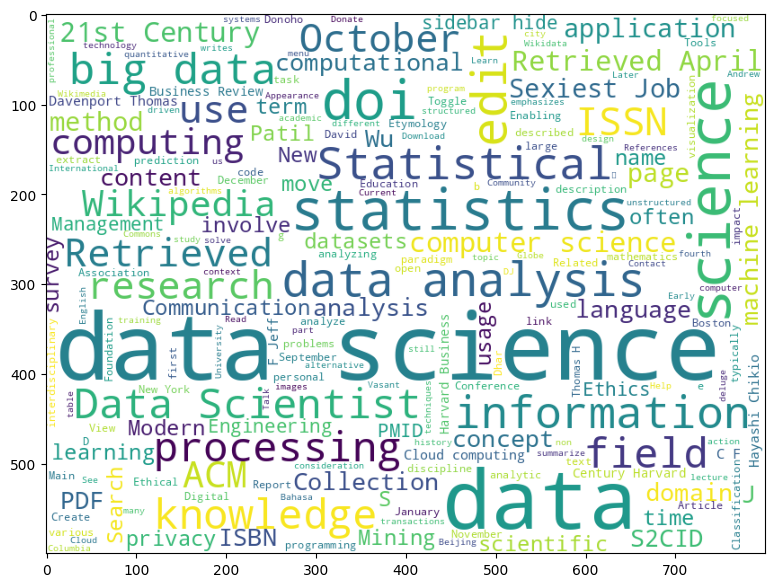

In [21]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
sales = pd.read_csv(
    'sales_data.csv',
    parse_dates=['Date'])

In [25]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [26]:
sales.shape

(113036, 18)

In [27]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [28]:
sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674


In [29]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [30]:
sales['Unit_Cost'].mean()

267.296365759581

<Axes: >

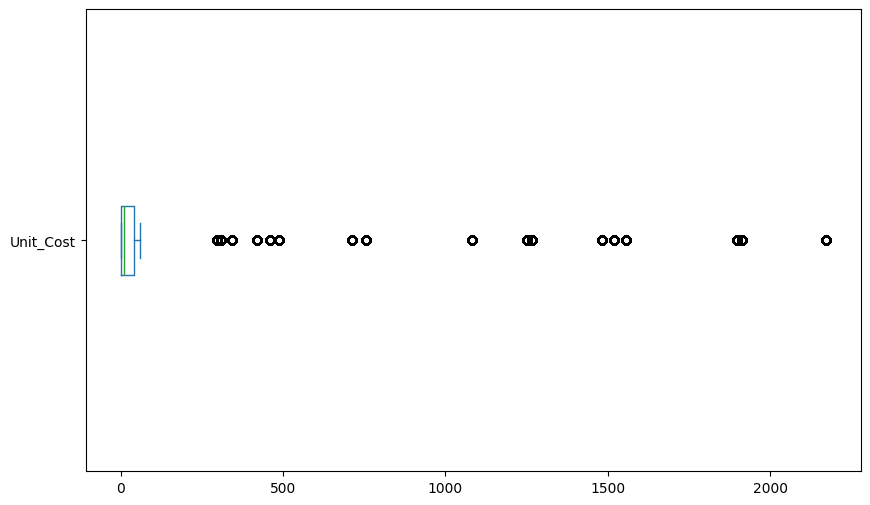

In [31]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(10,6))

<Axes: ylabel='Density'>

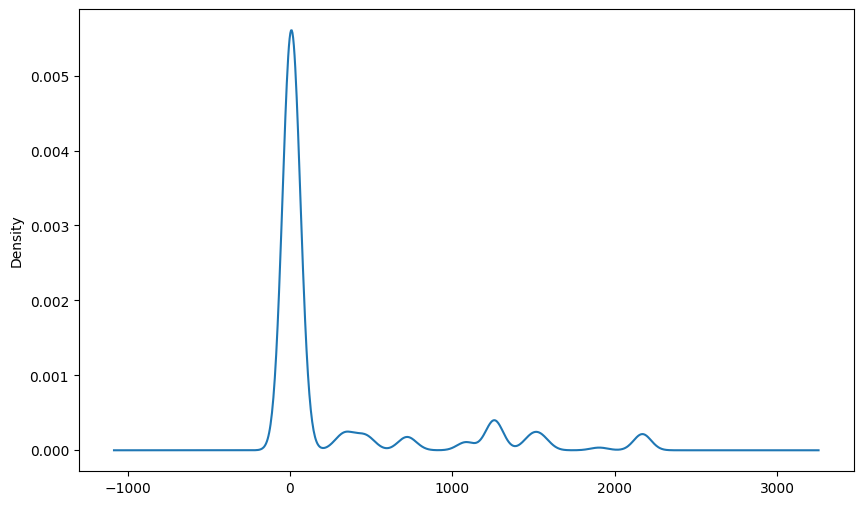

In [32]:
sales['Unit_Cost'].plot(kind='density', figsize=(10,6))

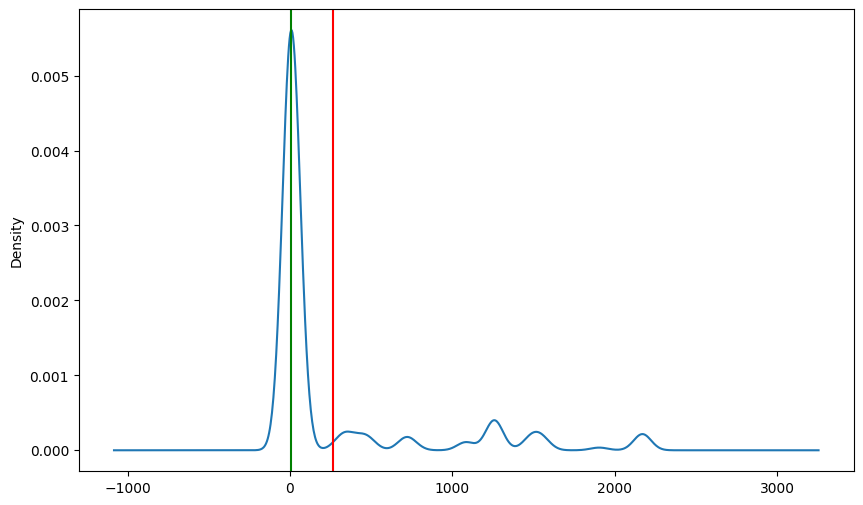

In [33]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(10,6))
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

<Axes: ylabel='count'>

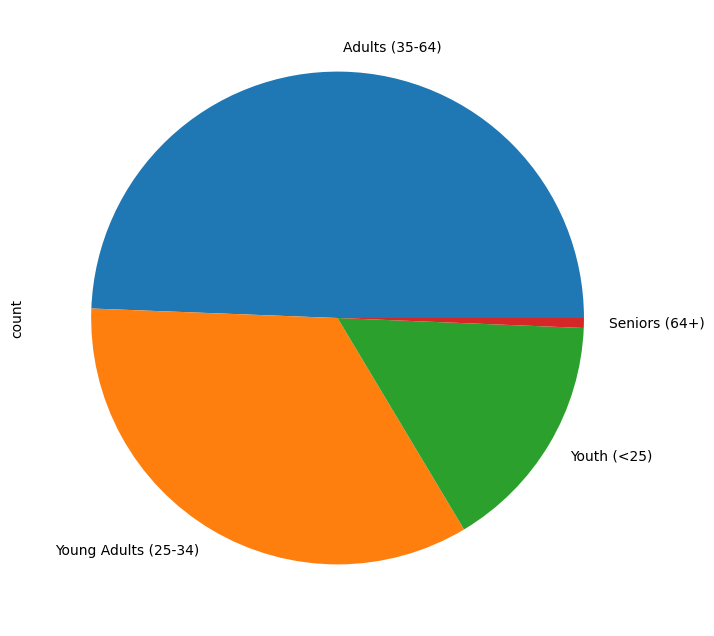

In [34]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(8,8))

Text(0, 0.5, 'Number of Sales')

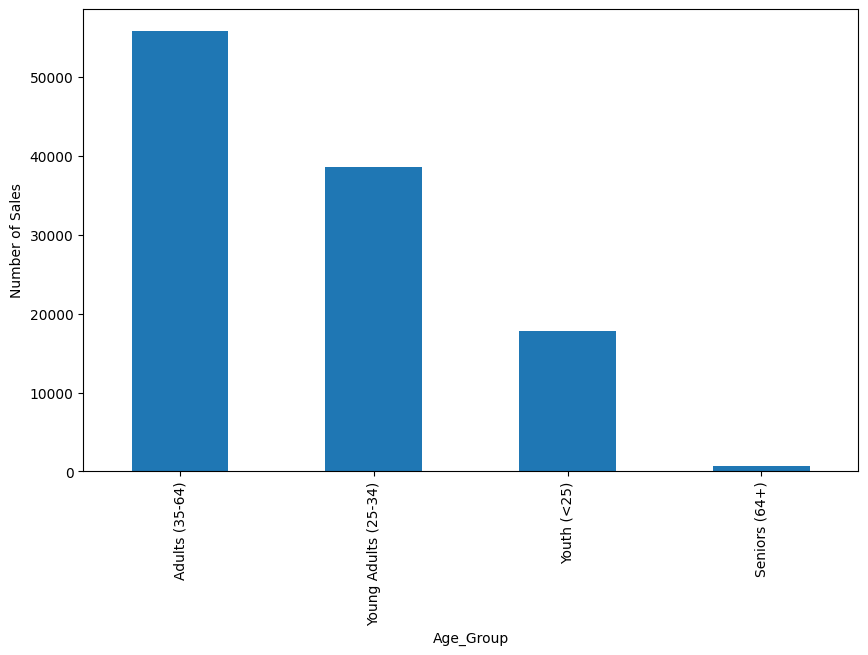

In [35]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(10,6))
ax.set_ylabel('Number of Sales')

In [36]:
sales_corr = sales[["Day", "Year", "Customer_Age", "Order_Quantity", "Unit_Cost", "Unit_Price", "Profit", "Cost", "Revenue"]]
sales_corr.head()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,2013,19,8,45,120,590,360,950
1,26,2015,19,8,45,120,590,360,950
2,23,2014,49,23,45,120,1366,1035,2401
3,23,2016,49,20,45,120,1188,900,2088
4,15,2014,47,4,45,120,238,180,418


In [37]:
corr = sales_corr.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


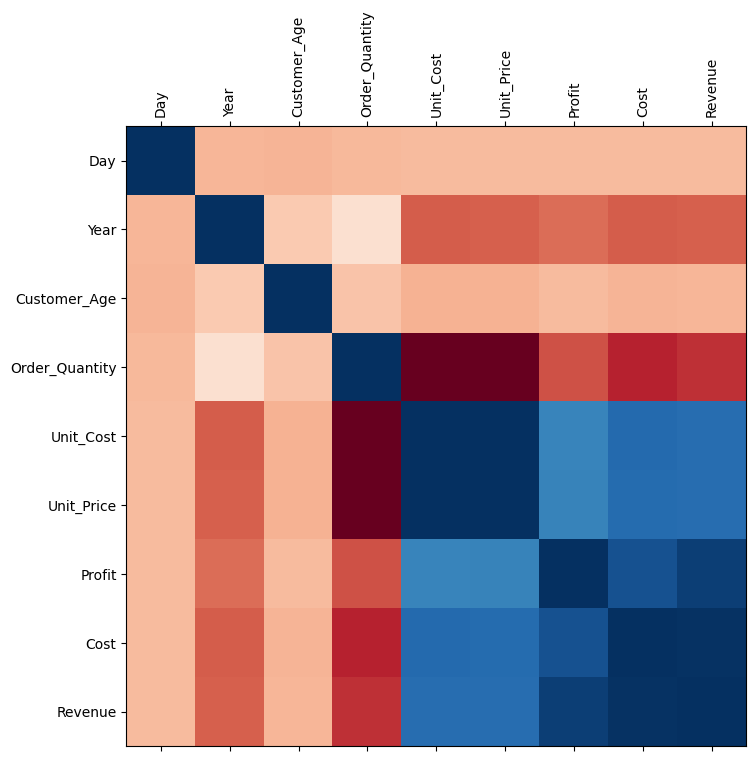

In [38]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<Axes: xlabel='Customer_Age', ylabel='Revenue'>

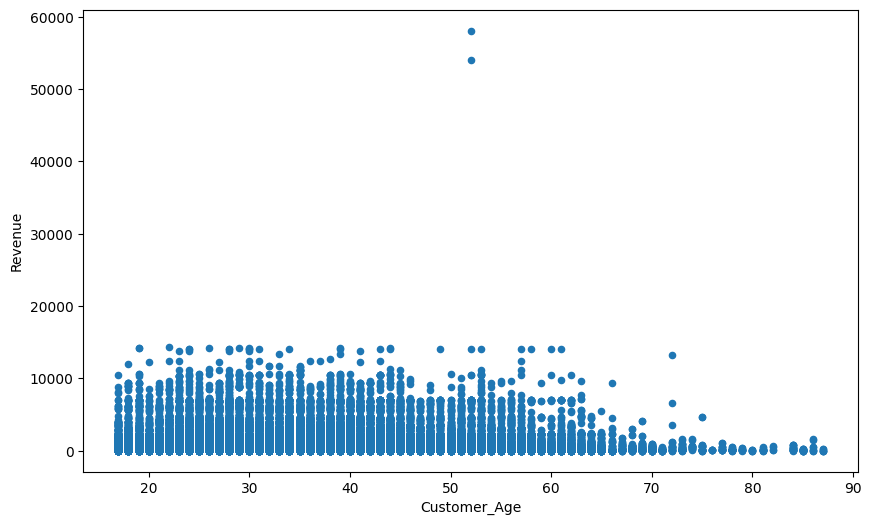

In [39]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(10,6))

<Axes: xlabel='Revenue', ylabel='Profit'>

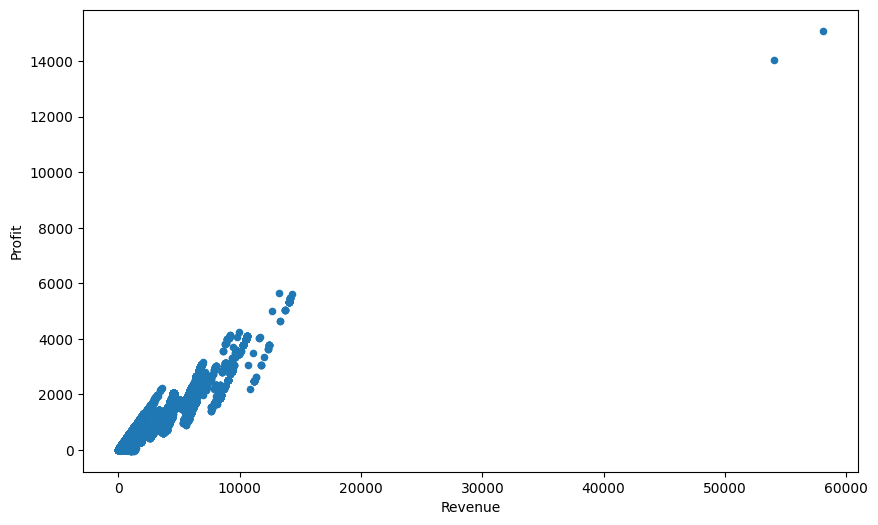

In [40]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(10,6))

Text(0, 0.5, 'Profit')

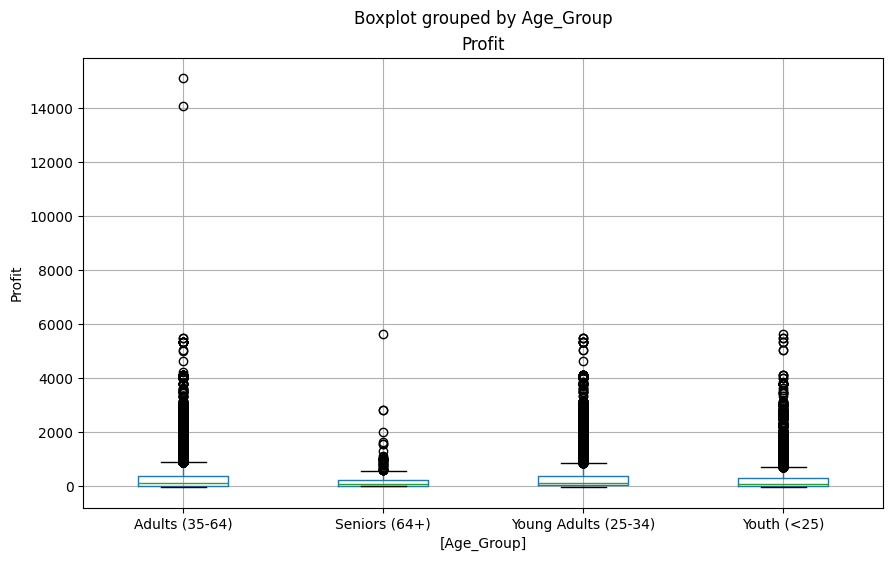

In [41]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

In [43]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']


Year                 Axes(0.125,0.53;0.227941x0.35)
Customer_Age      Axes(0.398529,0.53;0.227941x0.35)
Order_Quantity    Axes(0.672059,0.53;0.227941x0.35)
Unit_Cost            Axes(0.125,0.11;0.227941x0.35)
Unit_Price        Axes(0.398529,0.11;0.227941x0.35)
Profit            Axes(0.672059,0.11;0.227941x0.35)
dtype: object

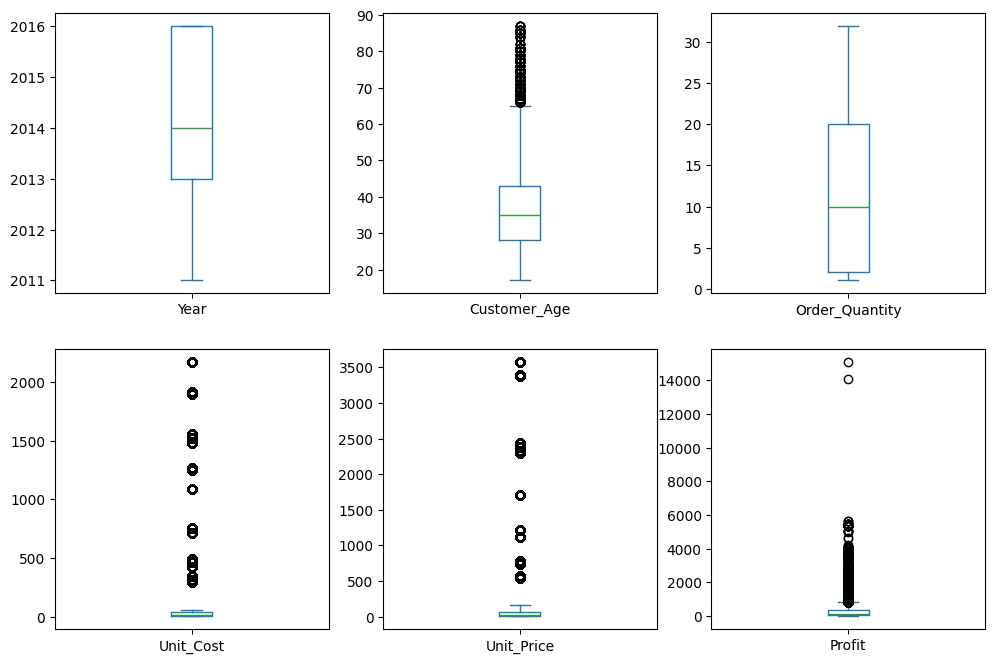

In [44]:
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(12,8))

In [45]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

In [46]:
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<Axes: ylabel='Density'>

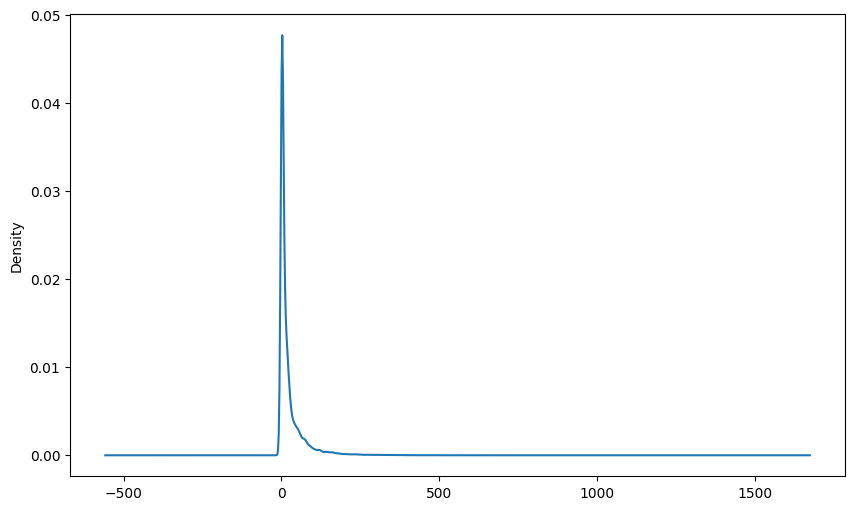

In [47]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(10,6))

In [48]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

In [49]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180


In [50]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

In [51]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [52]:
sales['Unit_Price'] *= 1.03
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

In [53]:
sales.loc[sales["Country"] == "Germany"]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
48,2013-08-07,7,August,2013,38,Adults (35-64),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,3,45,123.60,160,135,295,7.763158,135
49,2015-08-07,7,August,2015,38,Adults (35-64),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,53,45,98,2.578947,45
62,2013-09-25,25,September,2013,19,Youth (<25),F,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,123.60,320,270,590,31.052632,270
63,2015-09-25,25,September,2015,19,Youth (<25),F,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,123.60,427,360,787,41.421053,360
94,2013-09-23,23,September,2013,41,Adults (35-64),F,Germany,Hessen,Accessories,Bike Racks,Hitch Rack - 4-Bike,28,45,123.60,1865,1260,3125,76.219512,1260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113007,2016-03-28,28,March,2016,28,Young Adults (25-34),F,Germany,Saarland,Clothing,Vests,"Classic Vest, L",5,24,65.92,142,120,262,9.357143,120
113010,2014-04-10,10,April,2014,25,Young Adults (25-34),M,Germany,Hamburg,Clothing,Vests,"Classic Vest, S",28,24,65.92,995,672,1667,66.680000,672
113011,2016-04-10,10,April,2016,25,Young Adults (25-34),M,Germany,Hamburg,Clothing,Vests,"Classic Vest, S",28,24,65.92,995,672,1667,66.680000,672
113026,2013-07-08,8,July,2013,29,Young Adults (25-34),M,Germany,Hessen,Clothing,Vests,"Classic Vest, L",20,24,65.92,710,480,1190,41.034483,480


In [54]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

In [55]:
sales['Age_Group'].unique()

array(['Youth (<25)', 'Adults (35-64)', 'Young Adults (25-34)',
       'Seniors (64+)'], dtype=object)